_Refer to page 25-26_

## Code 1.4: PCA on noisy cloud of data.
Noteworthy: Data has zero mean and unit variance, so don't need to do
these two pre-processing steps.

The data was sampled then rotated and translated. These operations are
evident in the output singular values.

Video resource is [here](https://www.youtube.com/watch?v=Oi4SJqJIL2E&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv).

In [2]:
import os

# Pathing
os.chdir("/home/shaun/code/data-driven-ml-textbook")

import matplotlib.pyplot as plt
import numpy as np

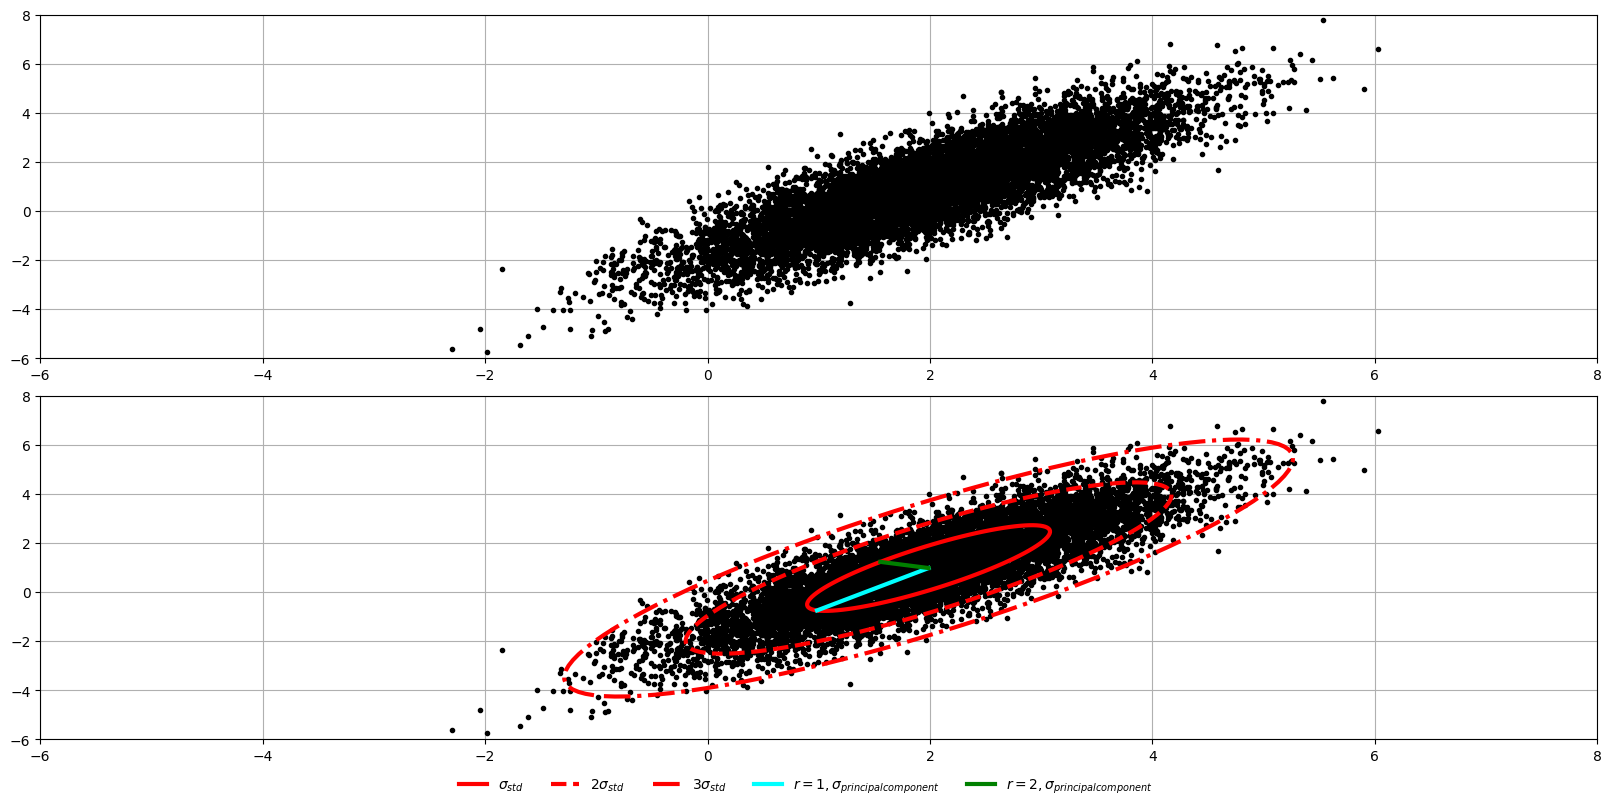

In [14]:
xC = np.array([2, 1])  # Center of data (mean)
sig = np.array([2, 0.5])  # Principal axes

theta = np.pi / 3  # Rotate cloud by pi/3

R = np.array(
    [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]  # Rotation matrix
)

nPoints = 10000  # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2, nPoints))

fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(16, 8))

ax[0].plot(X[0, :], X[1, :], ".", color="k")
ax[0].grid()
ax[0].set_xlim((-6, 8))
ax[0].set_ylim((-6, 8))


Xavg = np.mean(X, axis=1)  # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T  # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=0)

ax[1].plot(X[0, :], X[1, :], ".", color="k")  # Plot data to overlay PCA
ax[1].grid()
ax[1].set_xlim((-6, 8))
ax[1].set_ylim((-6, 8))

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax[1].plot(
    Xavg[0] + Xstd[0, :],
    Xavg[1] + Xstd[1, :],
    "-",
    color="r",
    linewidth=3,
    label="$\sigma_{std}$",
)
ax[1].plot(
    Xavg[0] + 2 * Xstd[0, :],
    Xavg[1] + 2 * Xstd[1, :],
    "--",
    color="r",
    linewidth=3,
    label="$2\sigma_{std}$",
)
ax[1].plot(
    Xavg[0] + 3 * Xstd[0, :],
    Xavg[1] + 3 * Xstd[1, :],
    "-.",
    color="r",
    linewidth=3,
    label="$3\sigma_{std}$",
)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax[1].plot(
    np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
    np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]),
    "-",
    color="cyan",
    linewidth=3,
    label="$r=1,\sigma_{principal component}$",
)
ax[1].plot(
    np.array([Xavg[0], Xavg[0] + U[0, 1] * S[1]]),
    np.array([Xavg[1], Xavg[1] + U[1, 1] * S[1]]),
    "-",
    color="green",
    linewidth=3,
    label="$r=2,\sigma_{principal component}$",
)

fig.legend(
    loc="outside lower center",
    ncol=10,
    facecolor="white",
    framealpha=1,
).get_frame().set_linewidth(0.0)

plt.show()

In [15]:
print(
    "Averaged matrix",
    np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
    np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]),
)

First principal component:  [1.98767506 0.98482475] [ 0.97588909 -0.75183558]
